In [2]:
import numpy as np


X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

In [3]:
# 给X的每一行添加1
X_b = np.c_[np.ones((100, 1)), X]
print(X_b[:5])
# 计算w
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[1.         0.82482895]
 [1.         0.90410431]
 [1.         0.37357226]
 [1.         0.14946079]
 [1.         0.5622163 ]]
[[4.60384636]
 [2.9011161 ]]


In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.60384636],
       [10.40607856]])

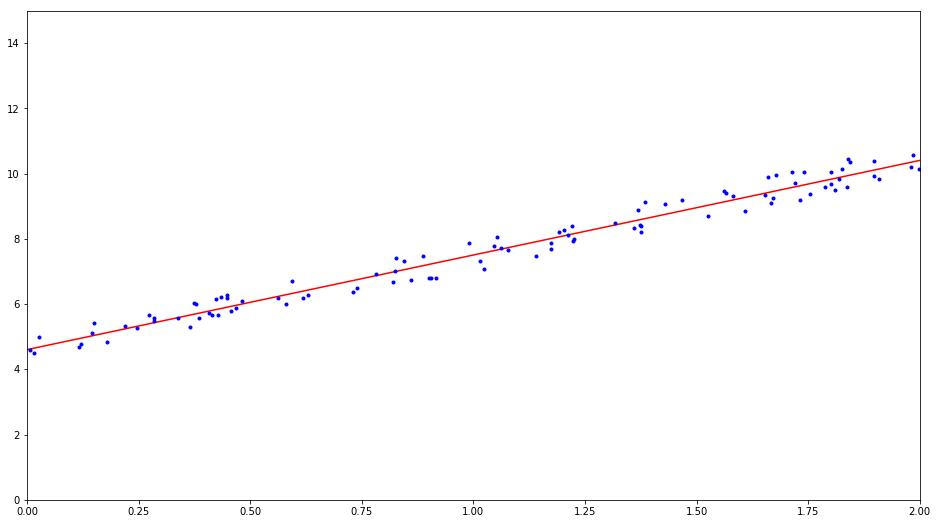

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.figure(figsize=(16, 9))
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)
lin_reg.predict(X_new)


[4.60384636] [[2.9011161]]


array([[ 4.60384636],
       [10.40607856]])

In [7]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.rand(2, 1)
print(theta)
for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[0.7380598 ]
 [0.61034564]]
[[4.60384636]
 [2.9011161 ]]


In [8]:
# 随机梯度下降
n_epoch = 50

t0, t1 = 5, 50

theta = np.random.rand(2, 1)


def learning_schedule(t):
    return t0 / (t + t1)


for epoch in range(n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 / 1 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.59726277]
 [2.91105759]]


In [9]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[4.6088223] [2.90913987]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


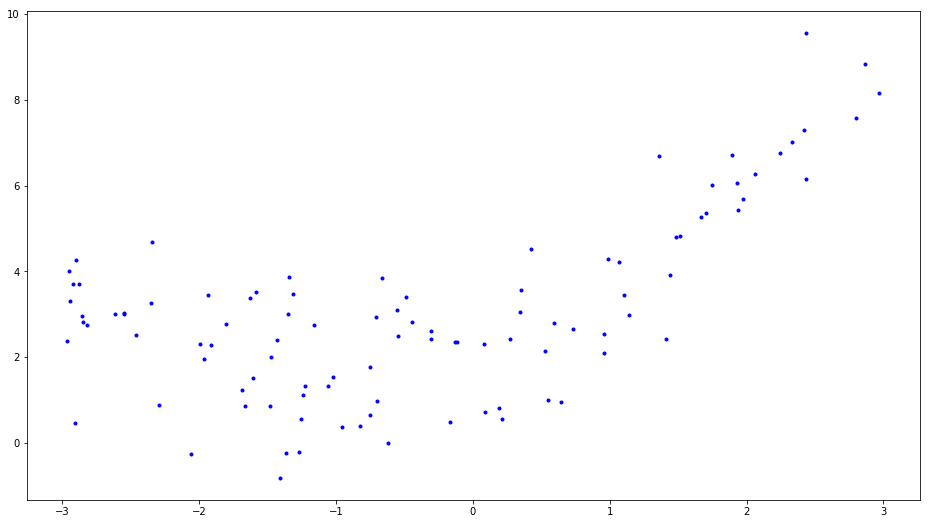

In [10]:
# 多项式
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.figure(figsize=(16, 9))
plt.plot(X, y, "b.")
# plt.axis([0, 2, 0, 15])
plt.show()

In [12]:
from sklearn.preprocessing import PolynomialFeatures


poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-1.80355123]
[-1.80355123  3.25279705]


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

# y = 0.46x^2 + 1.02x + 2.07

[2.01538293]
[[0.95622957 0.52049047]]


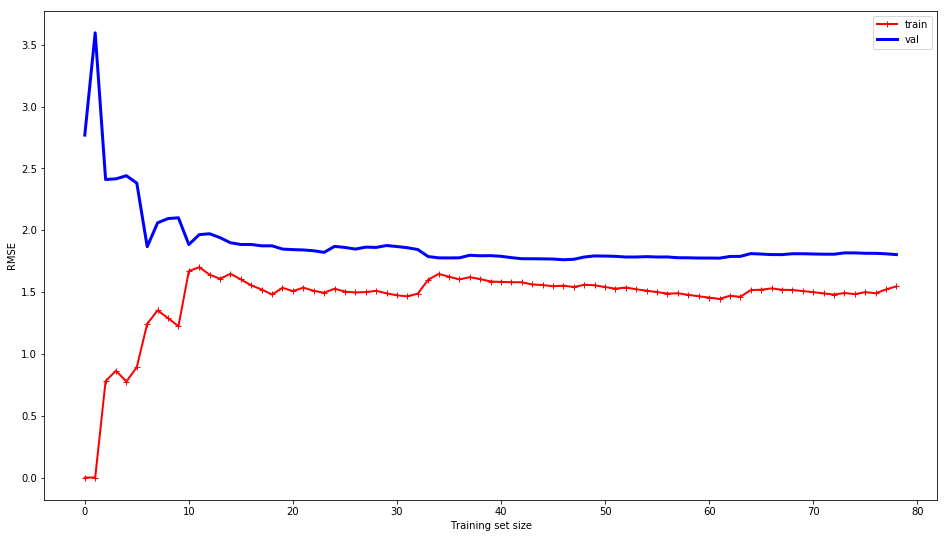

In [12]:
# 使用学习曲线法
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.figure(figsize=(16, 9))
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    line0,  = plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    line1, = plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(handles=[line0, line1])
    
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

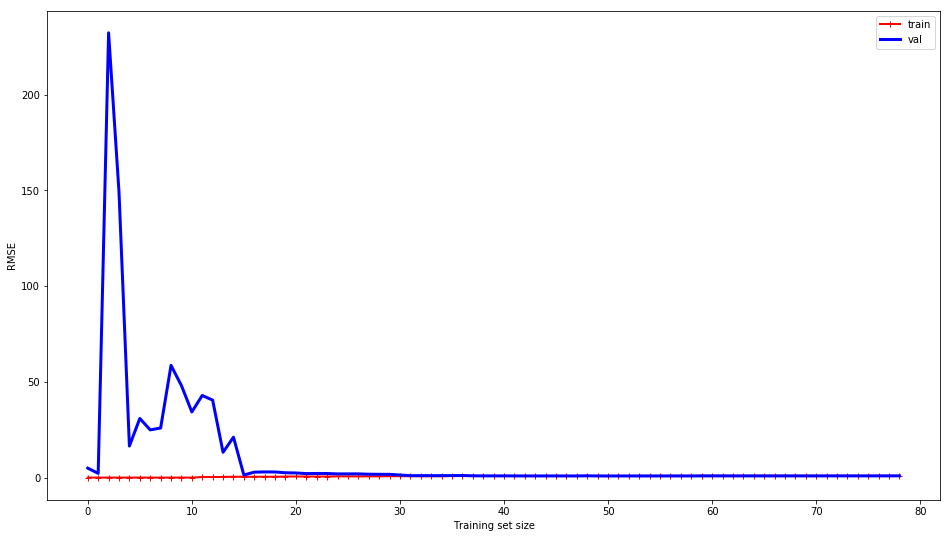

In [13]:
from sklearn.pipeline import Pipeline


polynomial_regression = Pipeline((("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
                                  ("lin_reg", LinearRegression())))
plot_learning_curves(polynomial_regression, X, y)

In [14]:
from sklearn.linear_model import Ridge


ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.86612307]])

In [15]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y)
sgd_reg.predict([[1.5]])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([3.93827822])

In [16]:
from sklearn.linear_model import Lasso


lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.81124105])

In [17]:
from sklearn.linear_model import ElasticNet


elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.8126944])

In [36]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler


# 准备数据
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        
print(minimum_val_error)
print(best_epoch)


1.0065219664311282
71


In [38]:
from sklearn import datasets


iris = datasets.load_iris()
print(list(iris.keys()))
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int)

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


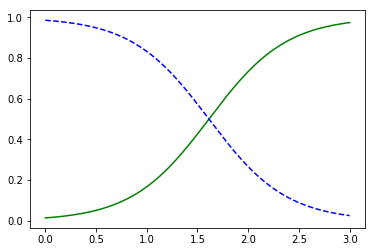

In [ ]:
from sklearn.linear_model import LogisticRegression


log_reg = LogisticRegression()
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

In [43]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [44]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]
